## 1. Data Ingestion

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [209]:
df=pd.read_csv("TSLA.csv")

In [210]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


#### univariate time series

In [211]:
stock_data=df[["Date","Close"]]

In [212]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [213]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [214]:
# Here date column is object type and need to be convert in Datetime format
stock_data["Date"]=pd.to_datetime(stock_data["Date"])

In [215]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


### Set Date column as index

In [216]:
stock_data=stock_data.set_index("Date")

In [217]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


## 2. EDA

In [218]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


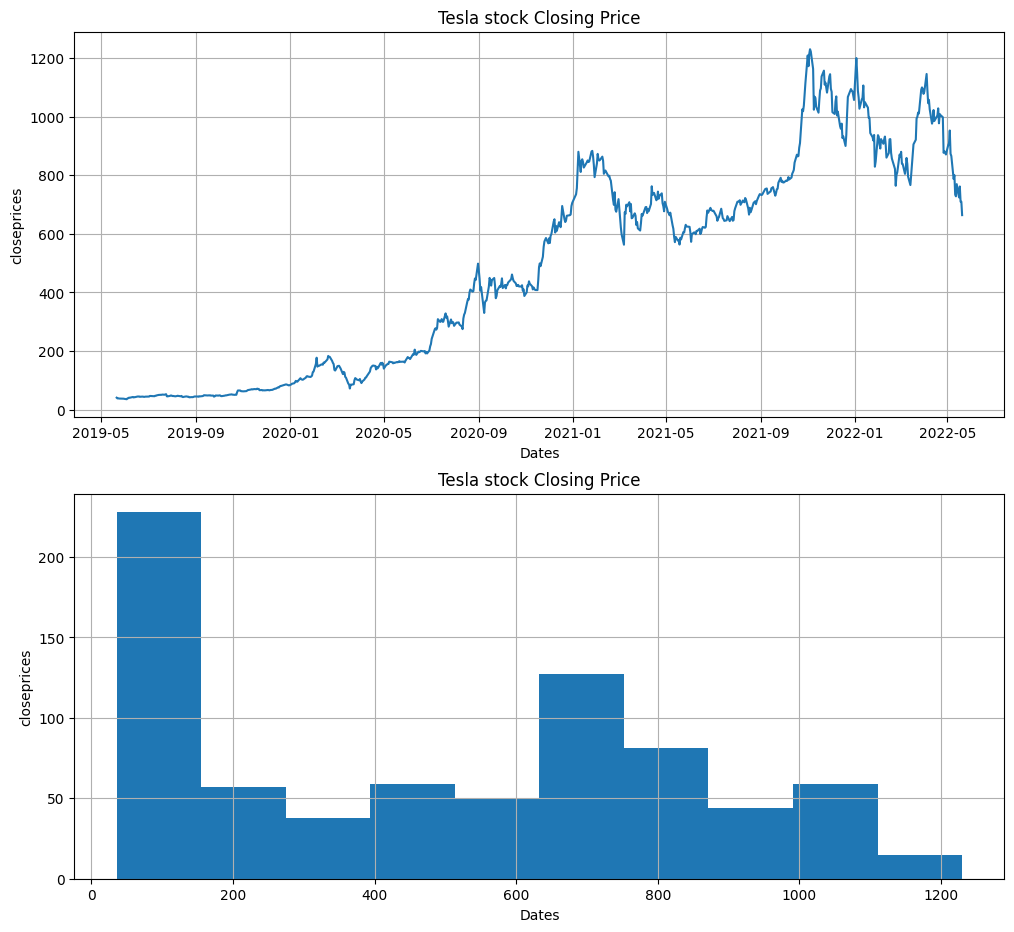

In [219]:
# visualize the time series data
plt.figure(figsize=(12,11))

plt.subplot(211)
plt.plot(stock_data["Close"])

plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("closeprices")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Tesla stock Closing Price")

plt.subplot(212)
plt.hist(stock_data["Close"])

plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("closeprices")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Tesla stock Closing Price")


plt.show()

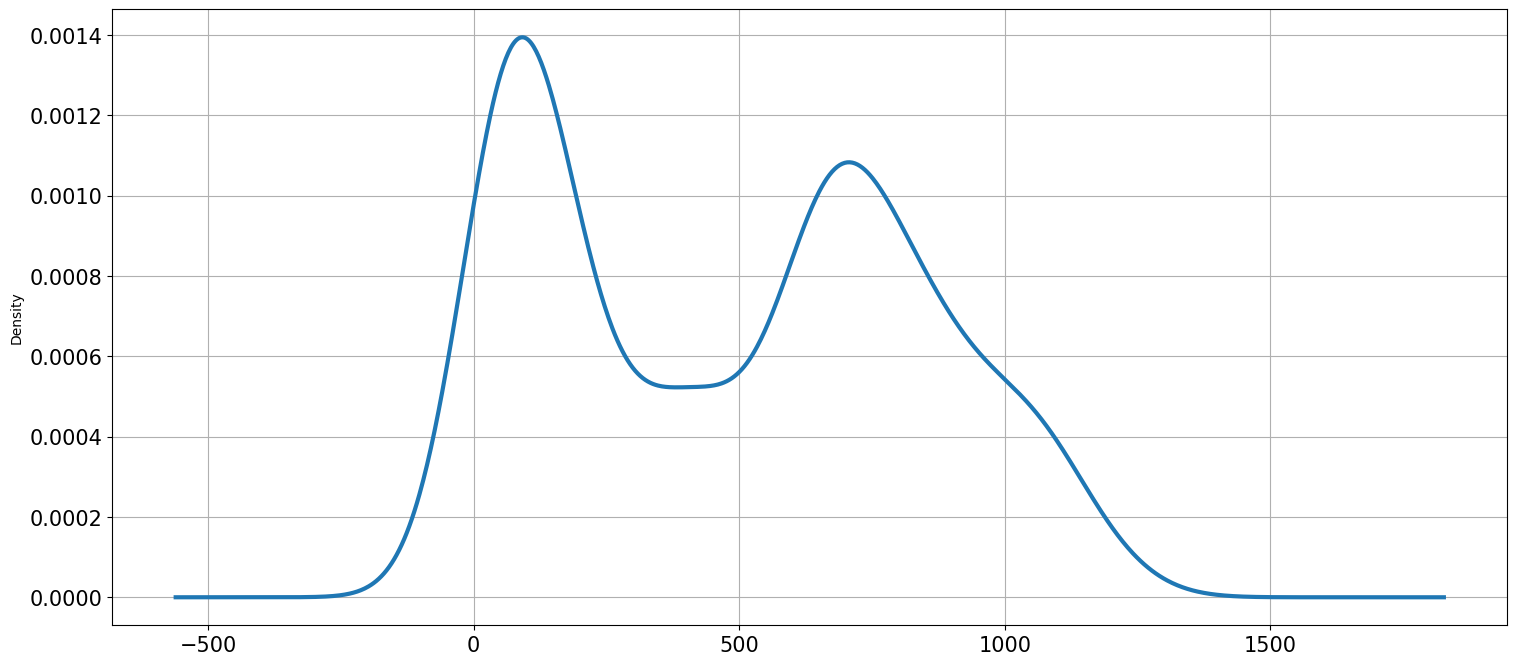

In [220]:
## Distribution of the close price
stock_data["Close"].plot(kind="kde",figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid(True)
plt.yticks(fontsize=15)
plt.show()

#### plot rolling mean and rolling std

In [221]:
rolmean=stock_data["Close"].rolling(12).mean() # for more smoothning we can increase window size
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [222]:
rolstd=stock_data["Close"].rolling(12).std()
rolstd

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    78.887958
2022-05-17    79.606002
2022-05-18    80.253903
2022-05-19    76.455365
2022-05-20    63.033361
Name: Close, Length: 758, dtype: float64

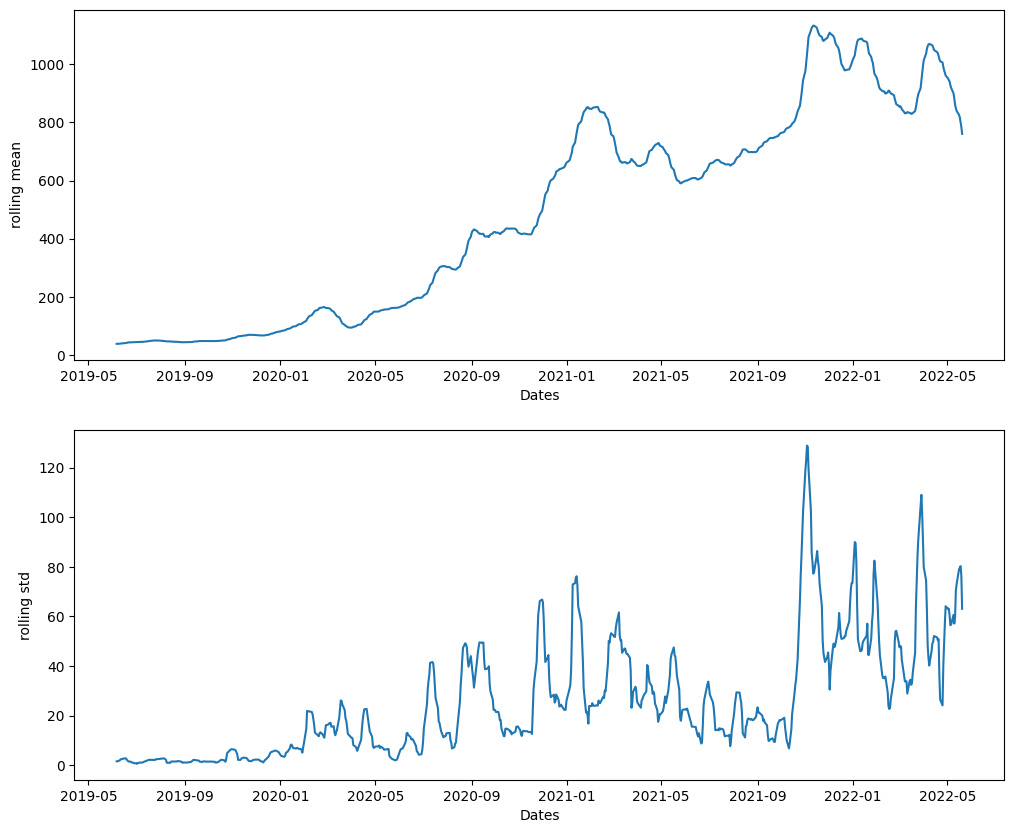

In [223]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(rolmean)
plt.ylabel("rolling mean")
plt.xlabel("Dates")

plt.subplot(212)
plt.plot(rolstd)
plt.ylabel("rolling std")
plt.xlabel("Dates")

plt.show()

### Check for data stationary or non-stationary using augmented dickey fuller test

In [224]:
from statsmodels.tsa.stattools import adfuller

In [225]:
adft=adfuller(stock_data["Close"])

In [226]:
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [227]:
pd.Series(adft[0:4],index=["test_stats","p value","lag value","data points"])

test_stats      -1.363009
p value          0.599876
lag value        9.000000
data points    748.000000
dtype: float64

p>0.05
accept null Hypothesis. It meaans that our data is non-stationary

#### create function for check stationary or non-stationary

In [228]:

def test_stationary(timeseries):
    # determining rolling statistics
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    # plot rolling statistics
    plt.figure(figsize=(10,5))
    plt.grid("both")
    plt.plot(timeseries,color="blue",label="original")
    plt.plot(rolmean,color="red",label="rolling mean")
    plt.plot(rolstd,color="black",label="rolling std")

    plt.legend(loc="best")
    plt.title("Rolling mean and std")
    plt.show()

    print("result of dickey fuller test")
    adft=adfuller(timeseries)
    ## output for adft will give us without defining what the values are.
    ## Hence we manually write what values does it explains using for loop
    output=pd.Series(adft[0:4],index=["Test statistics","p value","No. of lag used","Total data points"])
    for key,values in adft[4].items():
        output["critical value(%s)"%key]=values
    print(output)


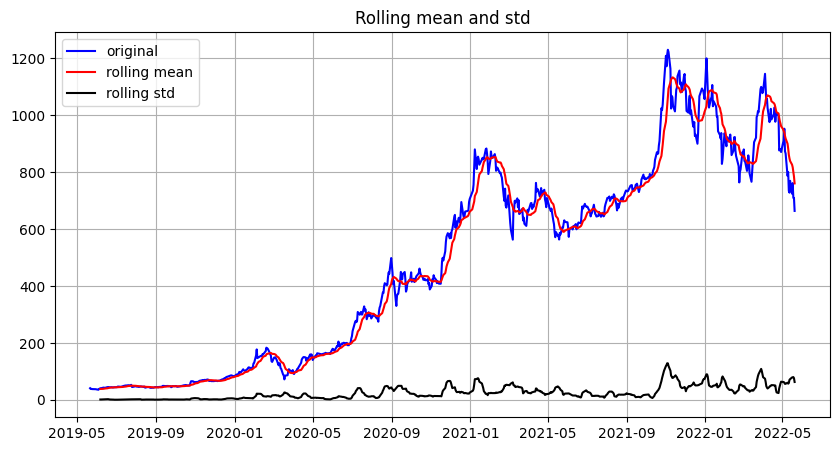

result of dickey fuller test
Test statistics         -1.363009
p value                  0.599876
No. of lag used          9.000000
Total data points      748.000000
critical value(1%)      -3.439123
critical value(5%)      -2.865412
critical value(10%)     -2.568832
dtype: float64


In [229]:
test_stationary(stock_data["Close"])

## decompose the time series data

In [230]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [231]:
result=seasonal_decompose(stock_data["Close"],period=12)

In [232]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

#### plot decompose components for better understanding the time series

<Figure size 1800x1800 with 0 Axes>

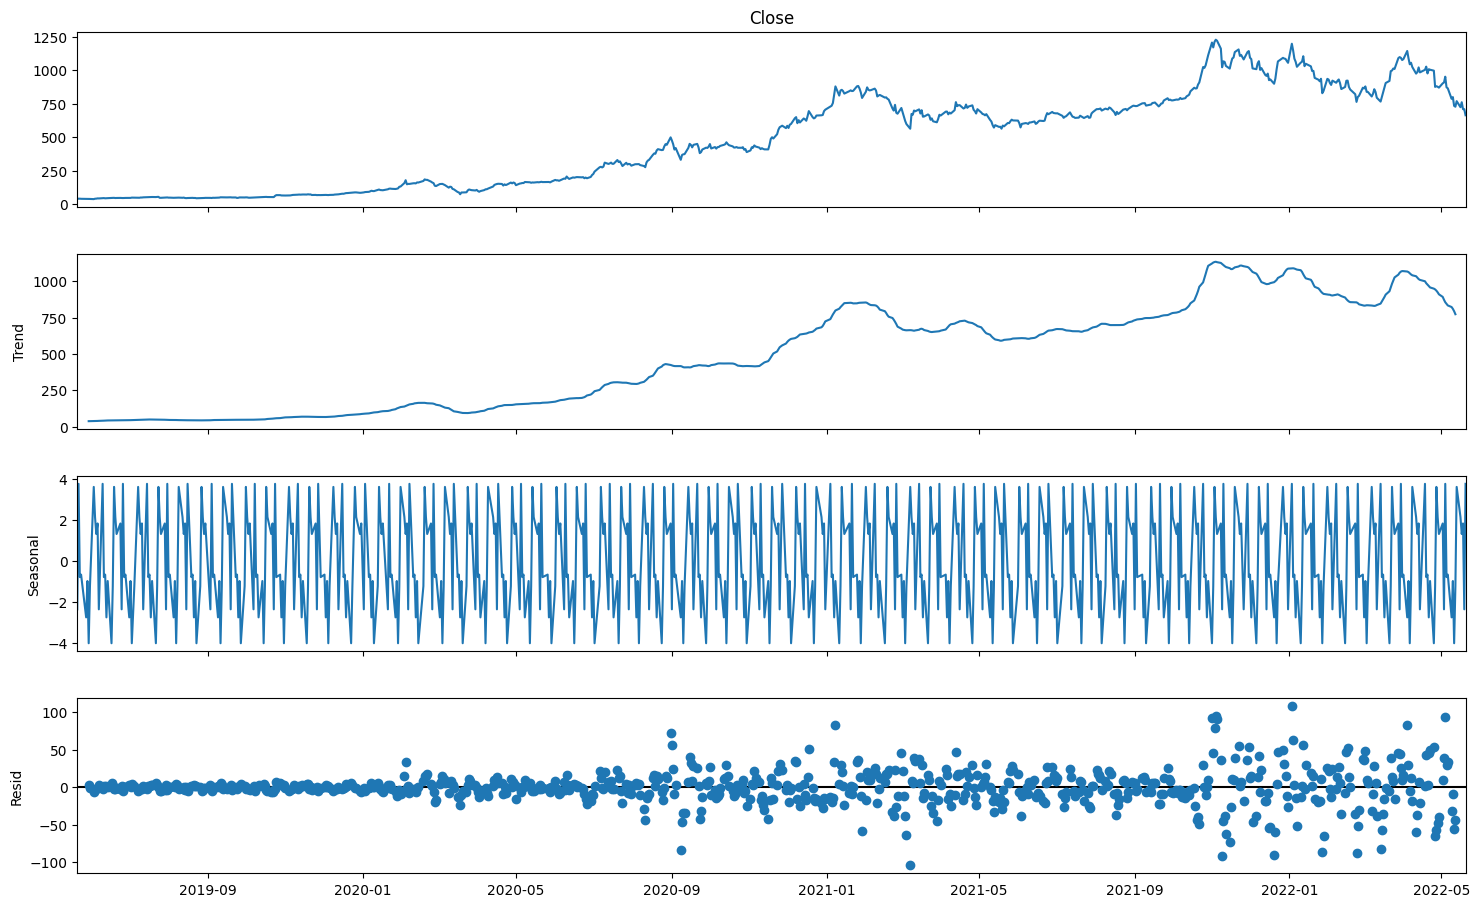

In [233]:
fig=plt.figure(figsize=(18,18))
fig=result.plot()
fig.set_size_inches(17,10)
plt.show()

<Figure size 1800x1800 with 0 Axes>

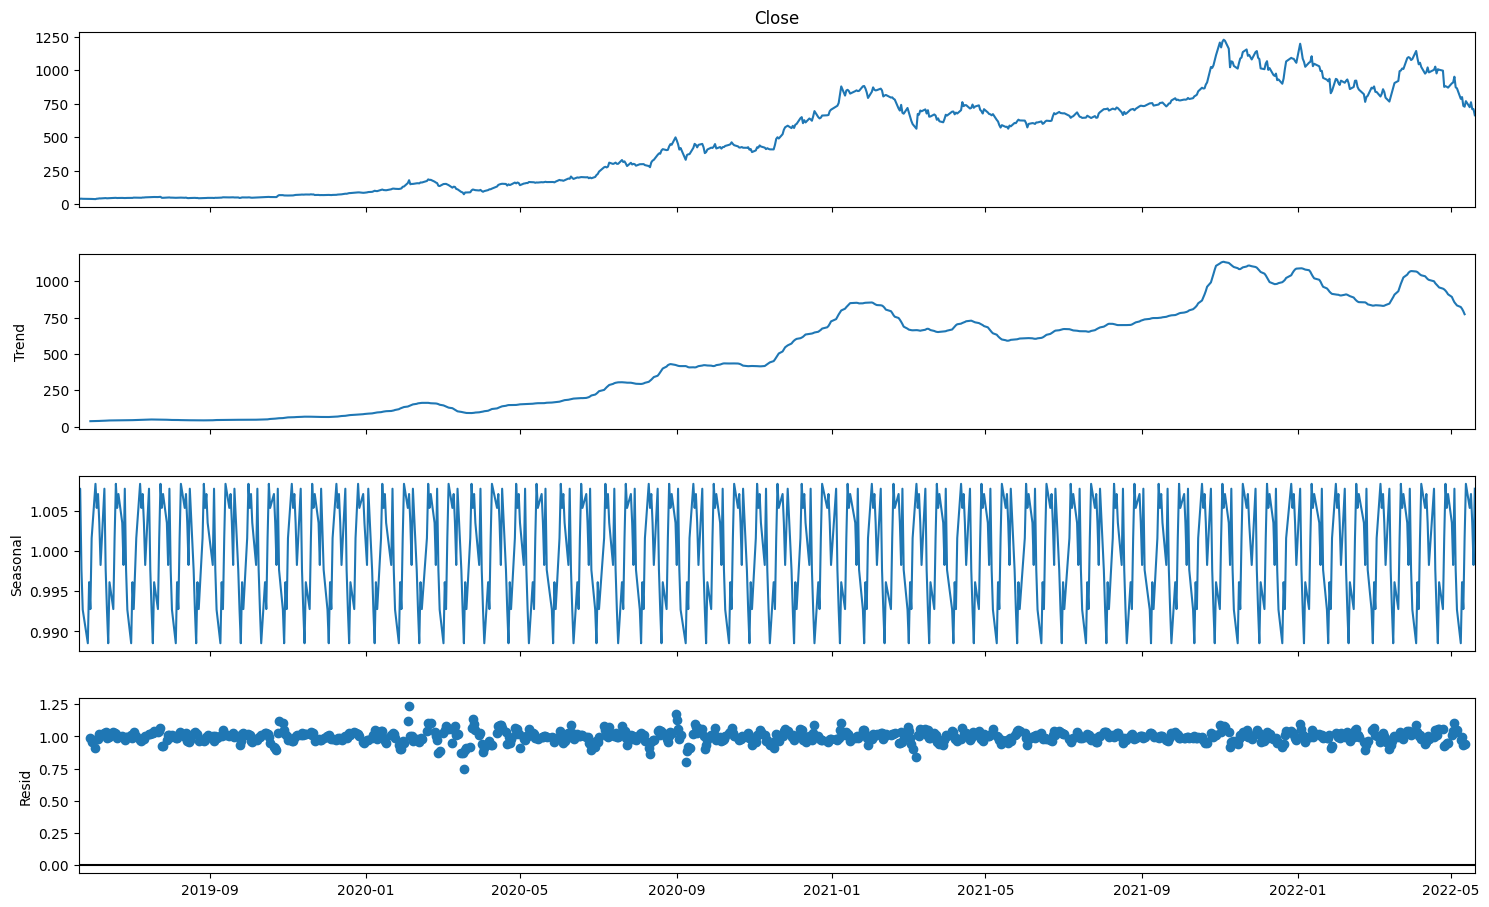

In [234]:
result=seasonal_decompose(stock_data["Close"],period=12,model="multiplicative")
fig=plt.figure(figsize=(18,18))
fig=result.plot()
fig.set_size_inches(17,10)
plt.show()

## check outlier

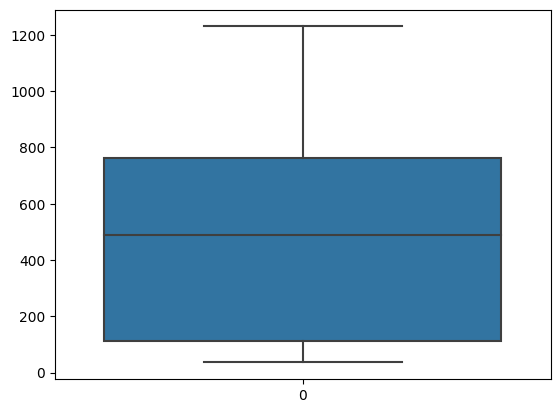

In [235]:
import seaborn as sns
sns.boxplot(stock_data["Close"])
plt.show()

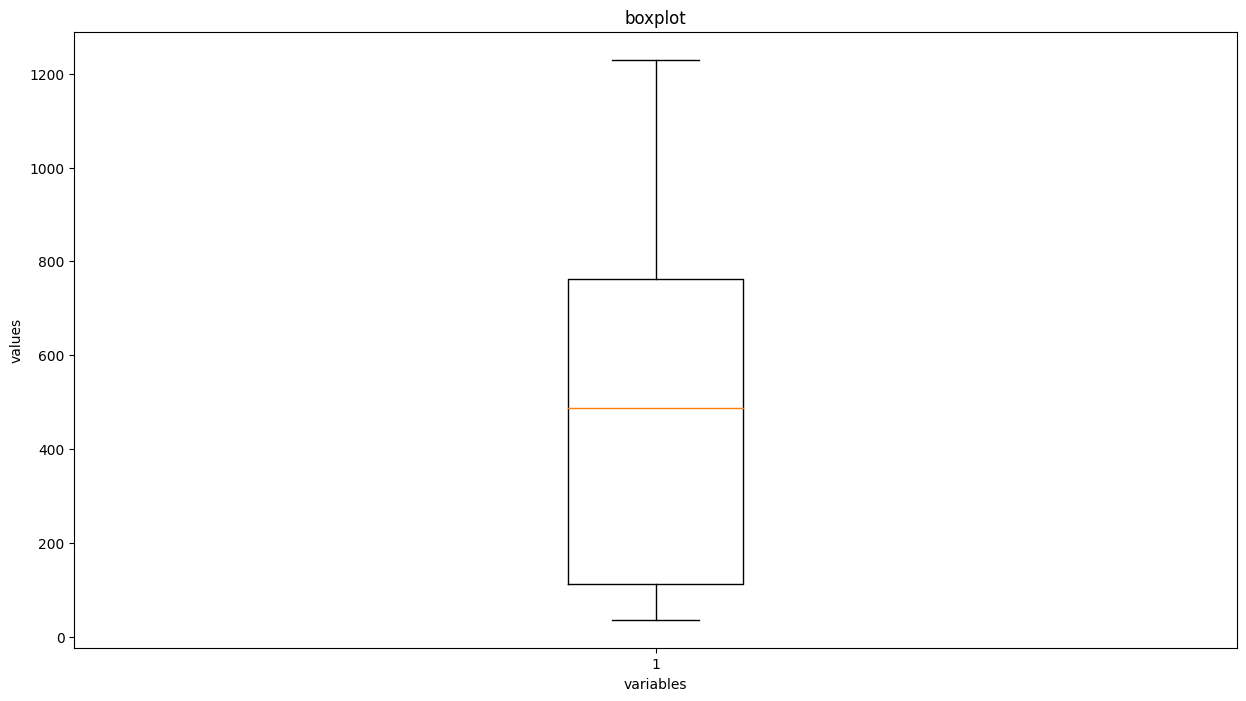

In [236]:
fig,ax=plt.subplots(figsize=(15,8))
ax.boxplot(stock_data["Close"])
ax.set_xlabel("variables")
ax.set_ylabel("values")
ax.set_title("boxplot")
plt.show()

## plot Auto correlation function

In [237]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [238]:
import warnings
warnings.filterwarnings("ignore")


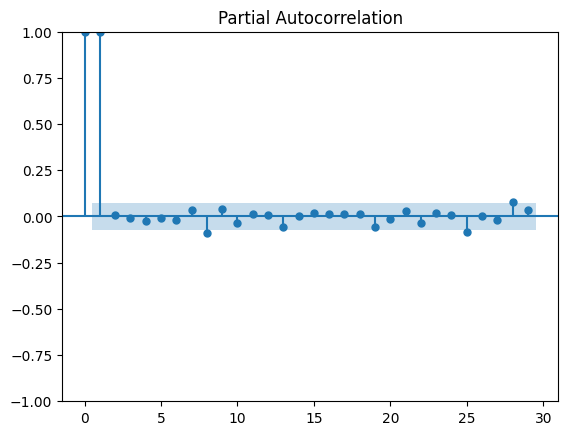

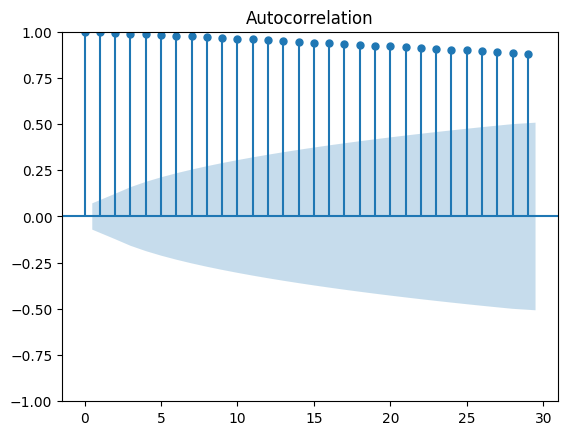

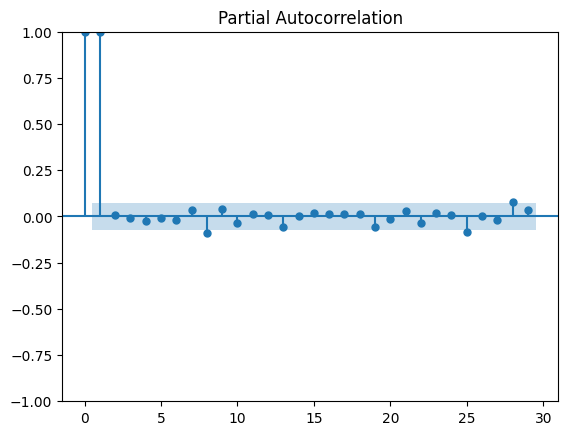

In [239]:
plot_acf(stock_data["Close"])
plot_pacf(stock_data["Close"])

#Figure 1: ACF plot (produced by the first call to plot_acf).
#Figure 2: PACF plot (produced by the first call to plot_pacf).
#Figure 3: PACF plot (produced by the second call to plot_pacf).

# if we want only two figure specific then we can use lag=40

## preprocessing the data

#### fill missing value

In [240]:
stock_data.isnull().sum()

Close    0
dtype: int64

In [241]:
df_close=stock_data["Close"]

In [242]:
df_close=df_close.diff(2)
df_close

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 758, dtype: float64

In [243]:
df_close=df_close.dropna()

In [244]:
df_close

Date
2019-05-23    -1.917999
2019-05-24    -0.420002
2019-05-28    -1.357998
2019-05-29    -0.153999
2019-05-30    -0.096001
                ...    
2022-05-16    -3.630005
2022-05-17    -7.980042
2022-05-18   -14.559998
2022-05-19   -52.190002
2022-05-20   -45.909973
Name: Close, Length: 756, dtype: float64

#### test_ data is stationary or non-stationary

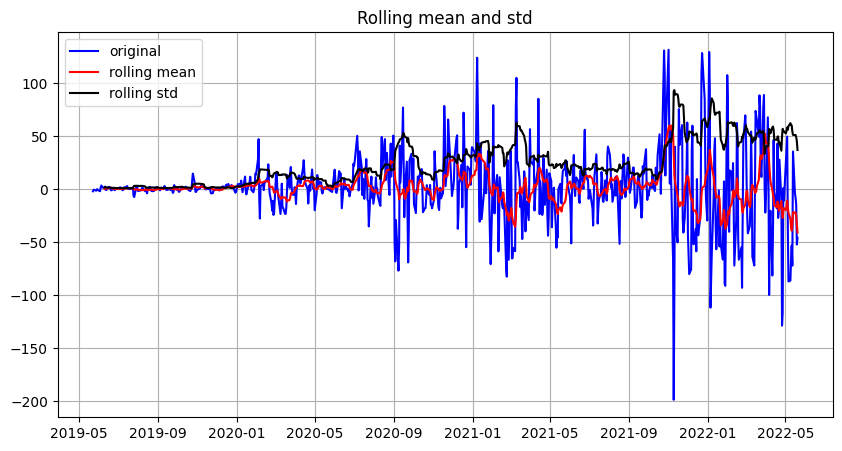

result of dickey fuller test
Test statistics       -6.027267e+00
p value                1.445919e-07
No. of lag used        1.700000e+01
Total data points      7.380000e+02
critical value(1%)    -3.439242e+00
critical value(5%)    -2.865464e+00
critical value(10%)   -2.568860e+00
dtype: float64


In [245]:
# call function
test_stationary(df_close)

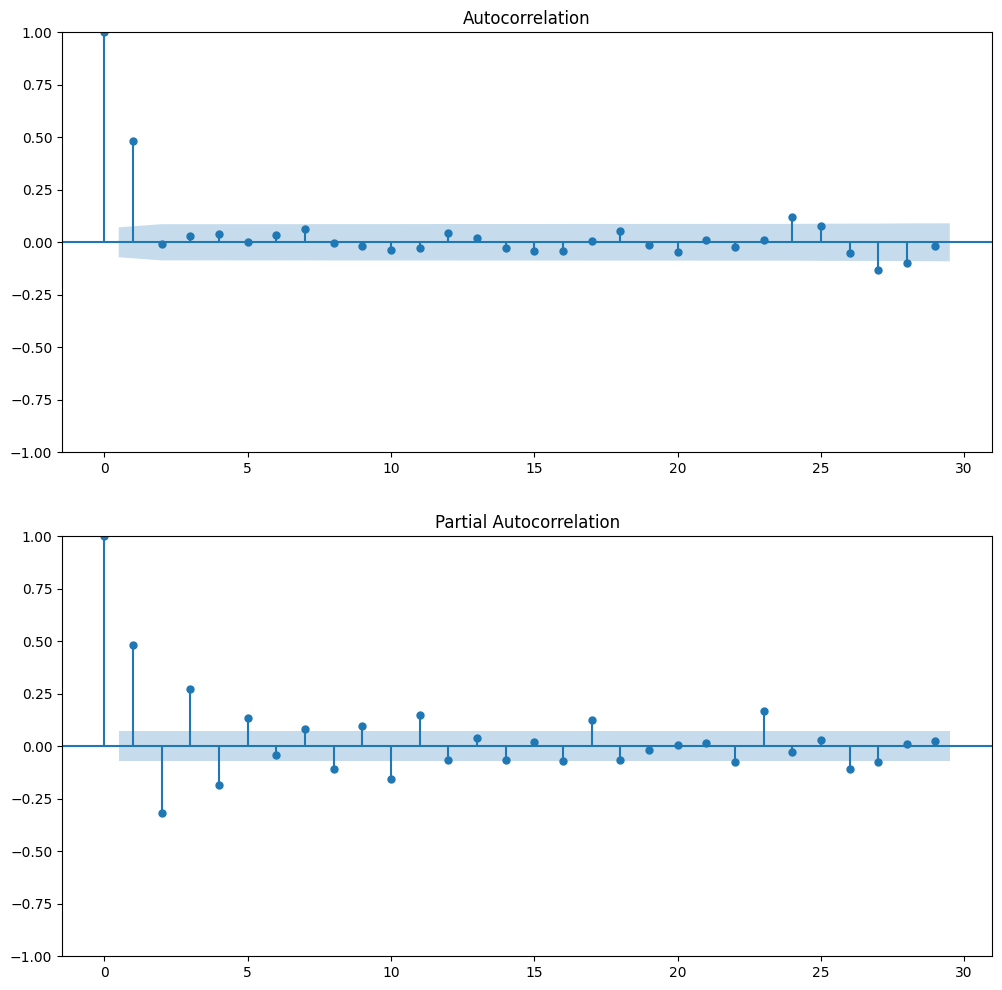

In [246]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(211)

fig= plot_acf(df_close,ax=ax1)

ax2=fig.add_subplot(212)

fig= plot_pacf(df_close,ax=ax2)

Train test split

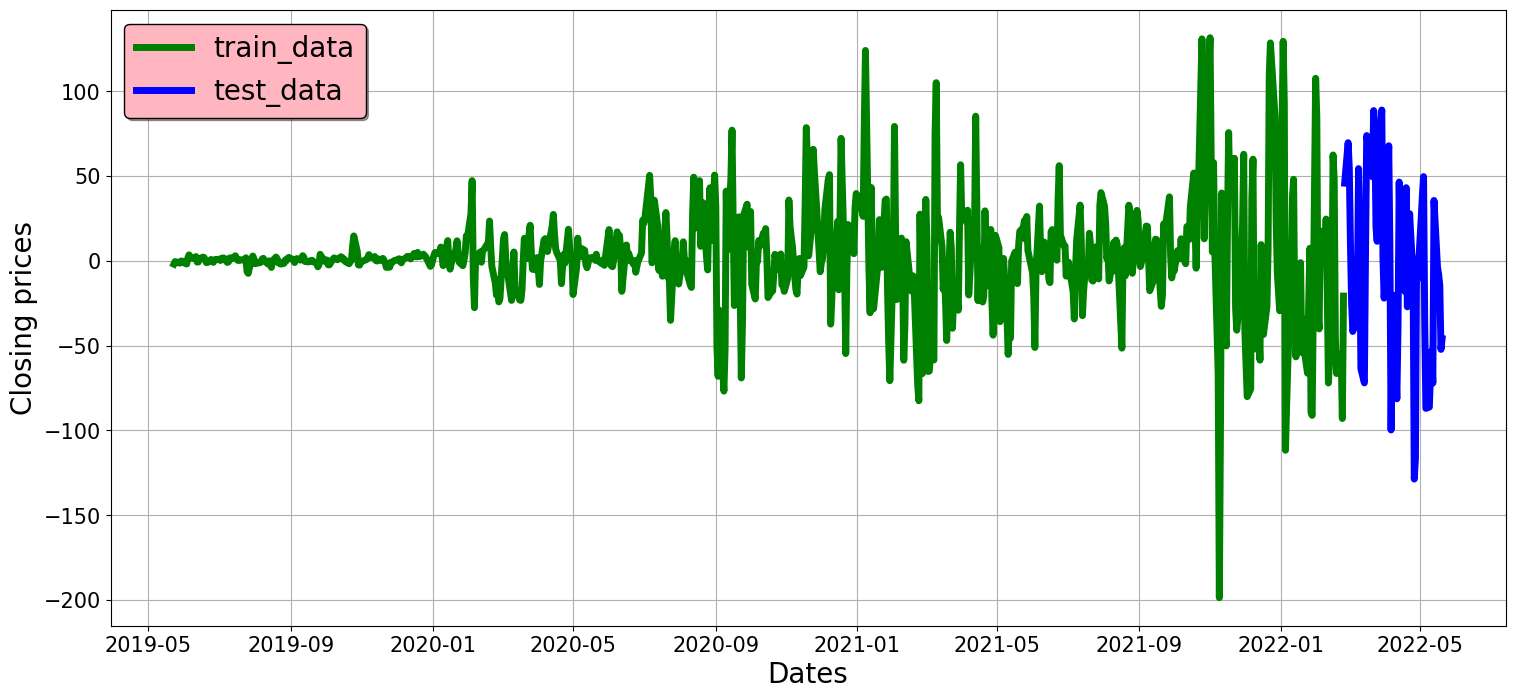

In [247]:
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.ylabel("Closing prices",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot(train_data,"green",label="train_data",linewidth=5)
plt.plot(test_data,"blue",label="test_data",linewidth=5)

plt.legend(fontsize=20,shadow=True,facecolor="lightpink",edgecolor="k")

# Time series Model Building

In [248]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [249]:
history=[x for x in train_data]

In [250]:
model=ARIMA(history,order=(1,1,1))

In [251]:
model=model.fit()

In [252]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  696
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3288.490
Date:                Sun, 29 Oct 2023   AIC                           6582.981
Time:                        15:14:14   BIC                           6596.612
Sample:                             0   HQIC                          6588.252
                                - 696                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4694      0.020     23.930      0.000       0.431       0.508
ma.L1         -0.9998      0.079    -12.681      0.000      -1.154      -0.845
sigma2       748.1424     63.628     11.758      0.000     623.433     872.852
===================================================================================
Ljung-Box (L1) (Q):                  14.93   Jarque-Bera (JB):              1417.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              32.48   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [253]:
model.forecast()

array([-8.63173022])

In [254]:
test_data[0]

45.83001708984375

In [255]:
mse=mean_squared_error([test_data[0]],model.forecast())

In [256]:
mse

2966.081919766745

In [257]:
import numpy as np

In [258]:
np.sqrt(mse)

54.46174730732338

In [259]:
p_value=range(0,3)
d_value=range(0,3)
q_value=range(0,3)

In [260]:
for i in p_value:
  for j in d_value:
    for k in q_value:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


### train ARIMA Model

In [261]:
def train_arima_model(X,y,arima_order):
  history=[x for x in X]
  predictions=list()
  for t in range(len(y)):
    model= ARIMA(history,order=arima_order)
    model_fit=model.fit()
    y_forecast=model_fit.forecast()[0]
    predictions.append(y_forecast)
    history.append(y[t])
  rmse=np.sqrt(mean_squared_error(y,predictions))
  return rmse

### Evaluate model

In [262]:
def evaluate_model(dataset,test,p_value,d_value,q_value):
  dataset=dataset.astype("float32")
  best_score,best_cfg=float("inf"),None
  for p in p_value:
    for d in d_value:
      for q in q_value:
        order=(p,d,q)
      try:
        rmse=train_arima_model(dataset,test,order)
        if rmse<best_score:
          best_score,best_cfg=rmse,order
        print("ARIMA%s RMSE=%.3f"%(order,rmse))
      except:
        continue
  print("Best ARIMA%s RMSE=%.3f"%(best_cfg,best_score))

#### call function

In [263]:
p_value=range(0,3)
d_value=range(0,3)
q_value=range(0,3)
evaluate_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(0, 0, 2) RMSE=39.605
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 2) RMSE=57.619
ARIMA(1, 0, 2) RMSE=39.984
ARIMA(1, 1, 2) RMSE=39.587
ARIMA(1, 2, 2) RMSE=46.234
ARIMA(2, 0, 2) RMSE=39.784
ARIMA(2, 1, 2) RMSE=39.726
ARIMA(2, 2, 2) RMSE=45.848
Best ARIMA(1, 1, 2) RMSE=39.587


In [272]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
  model= ARIMA(history,order=(1,1,2))
  model=model.fit()
  fc=model.forecast(alpha=0.05)
  predictions.append(fc)
  history.append(test_data[i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data,predictions))}")

RMSE is 39.586854873308404


In [273]:
test_data

Date
2022-02-25     45.830017
2022-02-28     69.659973
2022-03-01     54.500000
2022-03-02      9.460022
2022-03-03    -25.080017
2022-03-04    -41.600037
2022-03-07    -34.709961
2022-03-08    -13.889954
2022-03-09     54.389954
2022-03-10     13.899963
2022-03-11    -63.619995
2022-03-14    -71.929993
2022-03-15      6.540039
2022-03-16     73.859985
2022-03-17     69.709961
2022-03-18     65.160034
2022-03-21     49.559998
2022-03-22     88.589966
2022-03-23     77.950012
2022-03-24     19.940002
2022-03-25     11.530029
2022-03-28     77.919983
2022-03-29     88.929932
2022-03-30      2.150024
2022-03-31    -21.969971
2022-04-01     -9.400024
2022-04-04     67.849976
2022-04-05      6.670044
2022-04-06    -99.689941
2022-04-07    -34.000000
2022-04-08    -20.270020
2022-04-11    -81.330017
2022-04-12    -38.539978
2022-04-13     46.440002
2022-04-14     -1.950012
2022-04-18    -18.080017
2022-04-19     43.150024
2022-04-20    -27.089966
2022-04-21    -19.369995
2022-04-22     27.84

In [274]:
predictions

[array([35.61271568]),
 array([11.22640157]),
 array([58.98855466]),
 array([-3.37994927]),
 array([15.01287425]),
 array([-36.88601074]),
 array([-1.21981599]),
 array([-30.1326368]),
 array([18.82186416]),
 array([36.34953195]),
 array([-20.32690773]),
 array([-39.27124903]),
 array([-28.73498228]),
 array([37.11052556]),
 array([37.22985933]),
 array([33.38847871]),
 array([33.08974201]),
 array([18.21539458]),
 array([71.7833499]),
 array([8.09533864]),
 array([14.32468276]),
 array([-0.10781802]),
 array([79.70938618]),
 array([11.40750298]),
 array([-6.23607489]),
 array([-12.56319737]),
 array([6.11599843]),
 array([63.87599728]),
 array([-53.3565333]),
 array([-41.96083661]),
 array([10.99810028]),
 array([-28.10255649]),
 array([-49.51591733]),
 array([13.75954024]),
 array([34.74926144]),
 array([-33.71477236]),
 array([18.31657946]),
 array([26.85847052]),
 array([-50.48386437]),
 array([33.78953115]),
 array([-3.76812161]),
 array([-4.13459767]),
 array([-119.74770313]),
 a

## visualizations

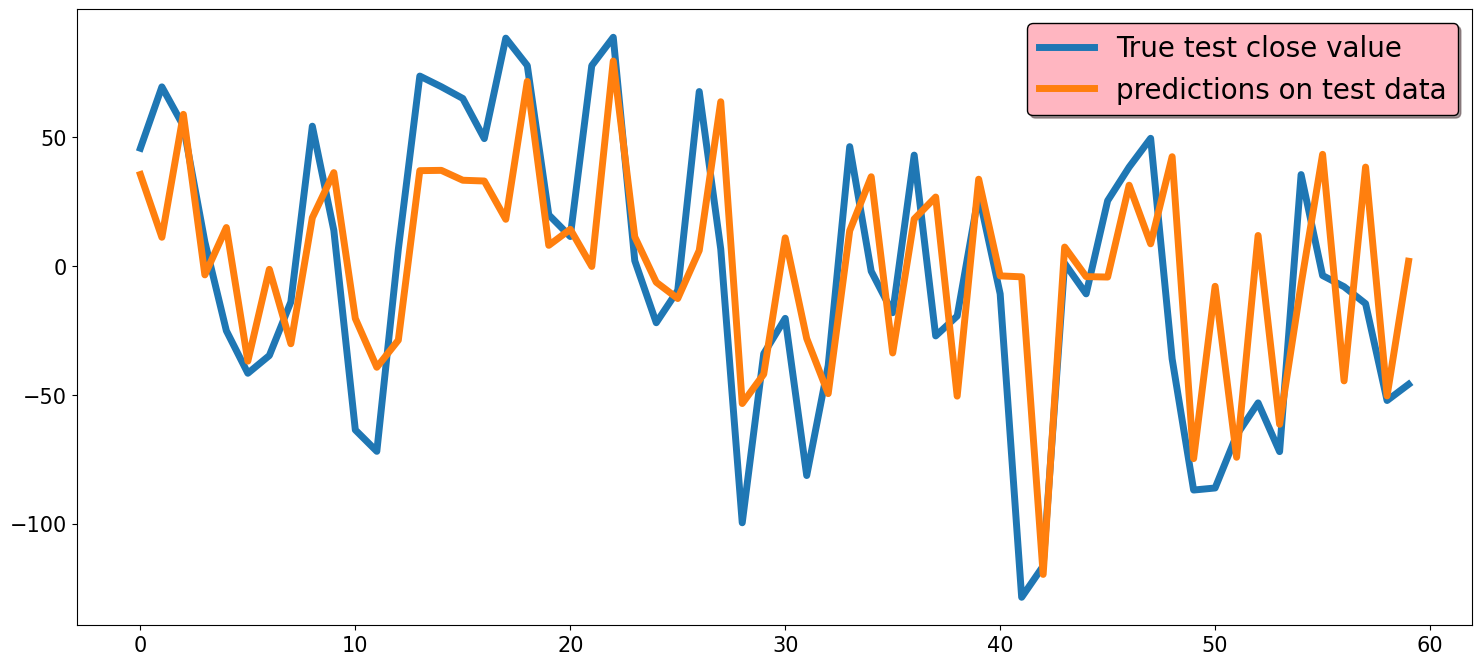

In [275]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)),test_data,label="True test close value",linewidth=5)
plt.plot(range(len(predictions)),predictions,label="predictions on test data",linewidth=5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,shadow=True,facecolor="lightpink",edgecolor="k")
plt.show()

#### visualize on entire data

In [276]:
fc_series=pd.Series(predictions,index=test_data.index)
fc_series

Date
2022-02-25       [35.61271567577874]
2022-02-28      [11.226401572562764]
2022-03-01       [58.98855466060915]
2022-03-02     [-3.3799492735989674]
2022-03-03      [15.012874246467371]
2022-03-04      [-36.88601073682885]
2022-03-07     [-1.2198159883409403]
2022-03-08     [-30.132636797987068]
2022-03-09      [18.821864163444683]
2022-03-10      [36.349531951728714]
2022-03-11     [-20.326907726634175]
2022-03-14      [-39.27124903126254]
2022-03-15     [-28.734982280345776]
2022-03-16       [37.11052555891634]
2022-03-17       [37.22985932995486]
2022-03-18       [33.38847870824422]
2022-03-21      [33.089742006739634]
2022-03-22      [18.215394584707862]
2022-03-23       [71.78334989848061]
2022-03-24        [8.09533863524787]
2022-03-25      [14.324682760494774]
2022-03-28    [-0.10781802289743858]
2022-03-29       [79.70938618159154]
2022-03-30      [11.407502983827143]
2022-03-31      [-6.236074885998473]
2022-04-01     [-12.563197367118962]
2022-04-04      [6.11599842571272

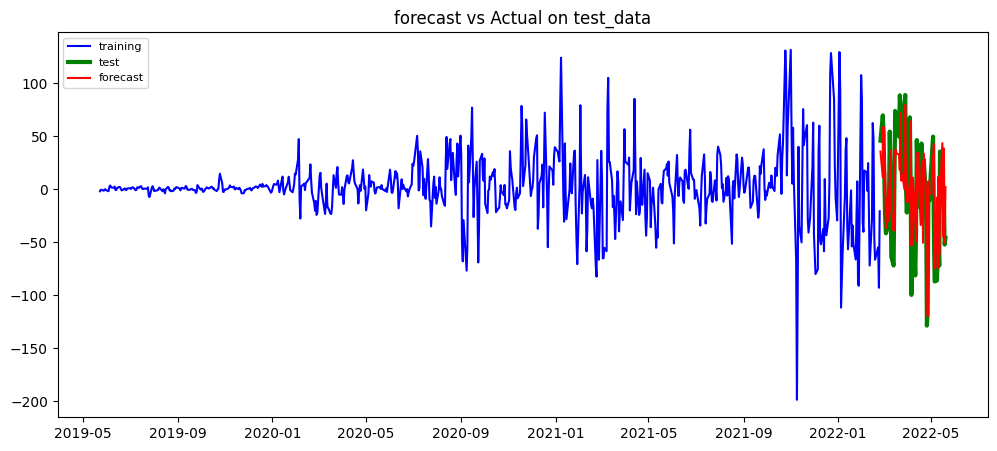

In [277]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data,label="training",color="blue")
plt.plot(test_data,label="test",color="green",linewidth=3)
plt.plot(fc_series,label="forecast",color="red")

plt.title("forecast vs Actual on test_data")
plt.legend(loc="upper left",fontsize=8)
plt.show()

### forecast for upcoming days

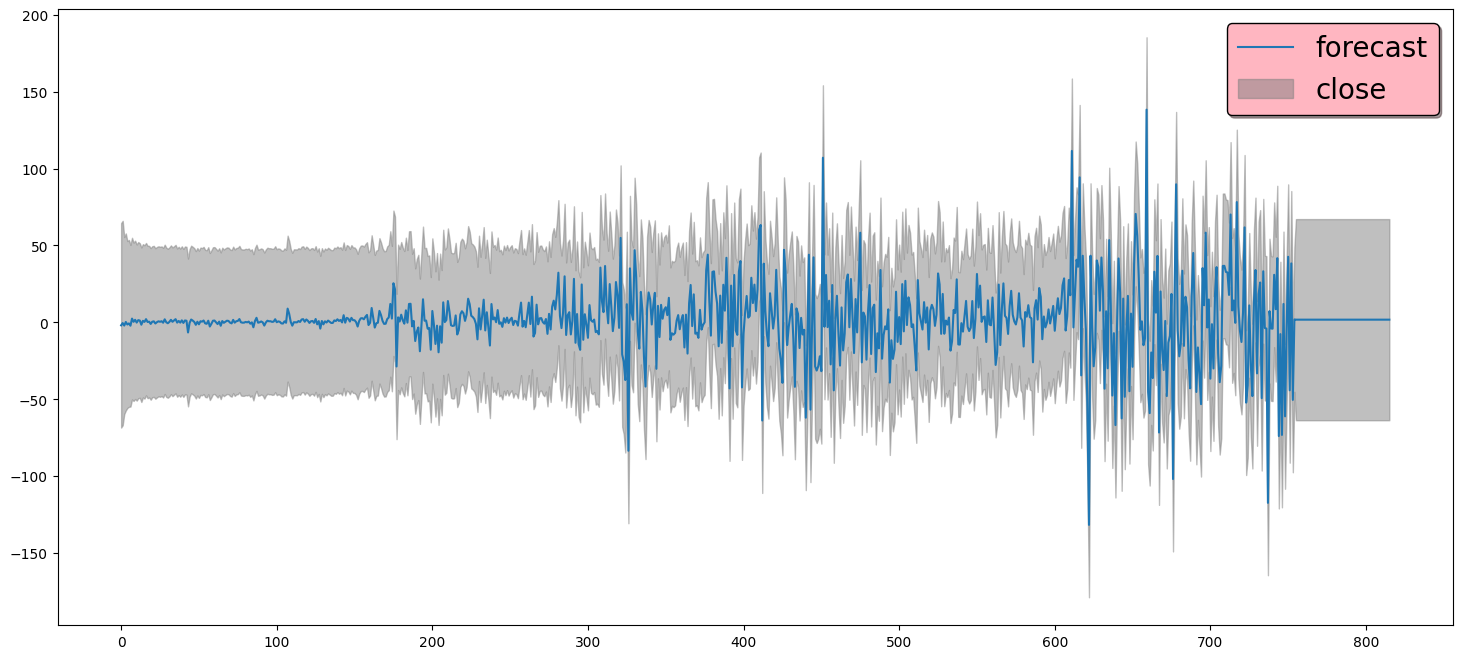

In [278]:
from statsmodels.graphics.tsaplots import plot_predict

fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
plot_predict(result=model,start=1,end=len(df_close)+60,ax=ax1)

plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightpink",edgecolor="k")
plt.show()

## SARIMA Model

In [279]:
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
  model= sm.tsa.statespace.SARIMAX(history,order=(0,1,0),seasonal_order=(1,1,1,3))
  model=model.fit()
  fc=model.forecast(alpha=0.05)
  predictions.append(fc)
  history.append(test_data[t])
print(f"RMSE of SARIMA model is {np.sqrt(mean_squared_error(test_data,predictions))}")

RMSE of SARIMA model is 50.87004531138428


#### visualization

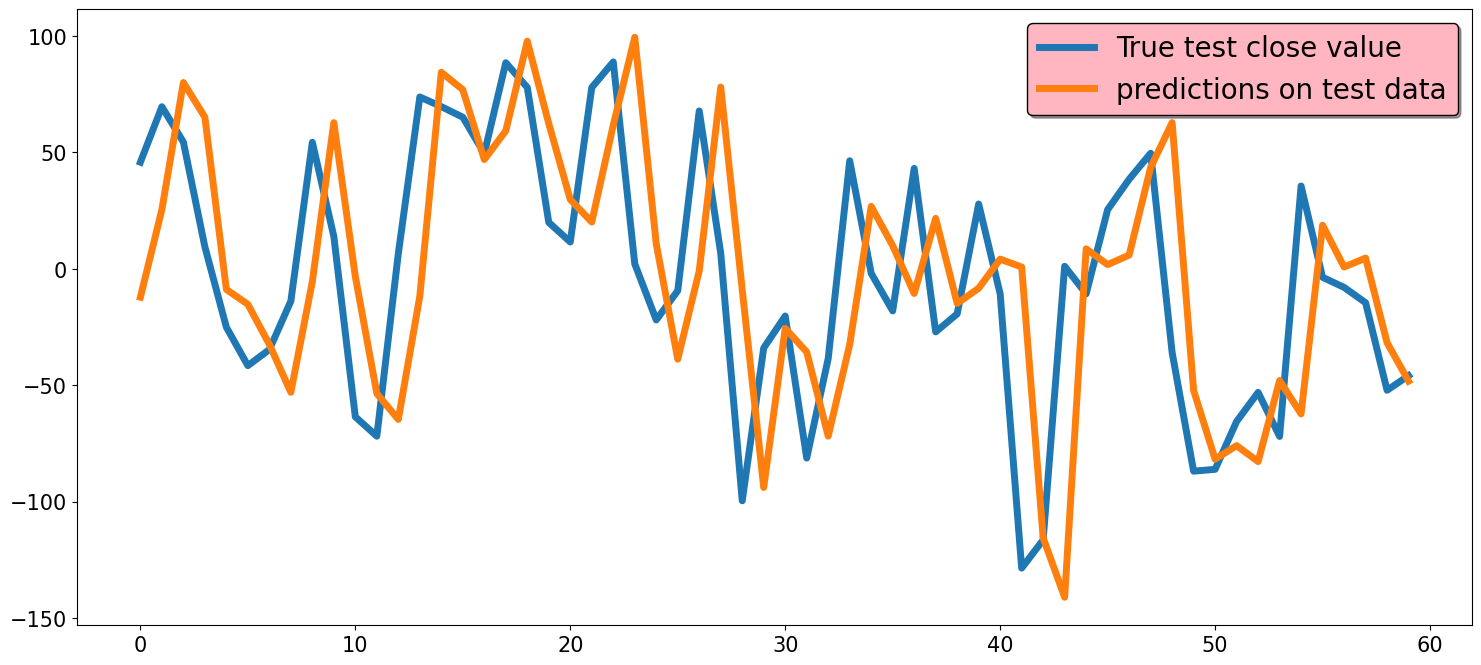

In [280]:
plt.figure(figsize=(18,8))
plt.plot(range(len(test_data)),test_data,label="True test close value",linewidth=5)
plt.plot(range(len(predictions)),predictions,label="predictions on test data",linewidth=5)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,shadow=True,facecolor="lightpink",edgecolor="k")
plt.show()